In [35]:
import os
import tensorflow as tf
import keras_cv


Using TensorFlow backend


In [13]:
config = {
    # Reproducibility
    "SEED": 42,
       
    # Training
    "data_dir": "/kaggle/input/UBC-OCEAN",
    "train_csv": os.path.join(DATA_DIR, "train.csv"),
    "train_imgs": os.path.join(DATA_DIR, "train_images"),
    "test_imgs": os.path.join(DATA_DIR, "test_images"),
    "test_thumbs": os.path.join(DATA_DIR, "test_thumbnails"),
    # TRAIN_PARQUET_FILE = "train_data.parquet",
    "TEST_CSV": os.path.join(DATA_DIR, "test.csv"),
    # TEST_PARQUET_FILE = "test_sequences.parquet",
    "PRED_CSV": "submission.csv"
}

config

{'SEED': 42,
 'data_dir': '/kaggle/input/UBC-OCEAN',
 'train_csv': '/kaggle/input/UBC-OCEAN/train.csv',
 'train_imgs': '/kaggle/input/UBC-OCEAN/train_images',
 'test_imgs': '/kaggle/input/UBC-OCEAN/test_images',
 'test_thumbs': '/kaggle/input/UBC-OCEAN/test_thumbnails',
 'TEST_CSV': '/kaggle/input/UBC-OCEAN/test.csv',
 'PRED_CSV': 'submission.csv'}

In [27]:
%%time

import pandas as pd

data_df = pd.read_csv(config["train_csv"]) 
data_df["path"] = [os.path.join(config["train_imgs"], f"{str(i)}.png")
                   for i in data_df["image_id"]]

def get_test_file_path(image_id):
    if os.path.exists(f"{TEST_DIR}/{image_id}_thumbnail.png"):
        return f"{TEST_DIR}/{image_id}_thumbnail.png"
    else:
        return f"{ALT_TEST_DIR}/{image_id}.png"

CPU times: user 9.04 ms, sys: 0 ns, total: 9.04 ms
Wall time: 9.71 ms


In [28]:
data_df

,image_id,label,image_width,image_height,is_tma,path
0,4,HGSC,23785,20008,False,/kaggle/input/UBC-OCEAN/train_images/4.png
1,66,LGSC,48871,48195,False,/kaggle/input/UBC-OCEAN/train_images/66.png
2,91,HGSC,3388,3388,True,/kaggle/input/UBC-OCEAN/train_images/91.png
3,281,LGSC,42309,15545,False,/kaggle/input/UBC-OCEAN/train_images/281.png
4,286,EC,37204,30020,False,/kaggle/input/UBC-OCEAN/train_images/286.png
...,...,...,...,...,...,...
533,65022,LGSC,53355,46675,False,/kaggle/input/UBC-OCEAN/train_images/65022.png
534,65094,MC,55042,45080,False,/kaggle/input/UBC-OCEAN/train_images/65094.png
535,65300,HGSC,75860,27503,False,/kaggle/input/UBC-OCEAN/train_images/65300.png
536,65371,HGSC,42551,41800,False,/kaggle/input/UBC-OCEAN/train_images/65371.png


# references

In [ ]:
https://www.kaggle.com/code/thangnm1/baseline-public-0-44
https://www.kaggle.com/code/pedro321/kerascv-train-and-infer-on-thumbnails-6e957d    

## visualizing

In [49]:
def read_image(path):
    file = tf.io.read_file(path)
    image = tf.io.decode_png(file, 3)
#     image = tf.image.resize(image, (256, 256))
#     image = tf.image.per_image_standardization(image)
    return image

In [50]:
data_df

,image_id,label,image_width,image_height,is_tma,path
0,4,HGSC,23785,20008,False,/kaggle/input/UBC-OCEAN/train_images/4.png
1,66,LGSC,48871,48195,False,/kaggle/input/UBC-OCEAN/train_images/66.png
2,91,HGSC,3388,3388,True,/kaggle/input/UBC-OCEAN/train_images/91.png
3,281,LGSC,42309,15545,False,/kaggle/input/UBC-OCEAN/train_images/281.png
4,286,EC,37204,30020,False,/kaggle/input/UBC-OCEAN/train_images/286.png
...,...,...,...,...,...,...
533,65022,LGSC,53355,46675,False,/kaggle/input/UBC-OCEAN/train_images/65022.png
534,65094,MC,55042,45080,False,/kaggle/input/UBC-OCEAN/train_images/65094.png
535,65300,HGSC,75860,27503,False,/kaggle/input/UBC-OCEAN/train_images/65300.png
536,65371,HGSC,42551,41800,False,/kaggle/input/UBC-OCEAN/train_images/65371.png


In [51]:
%%time
img = read_image(data_df["path"].values[0])
print(img.shape)

(20008, 23785, 3)
CPU times: user 10.8 s, sys: 1.47 s, total: 12.3 s
Wall time: 12.3 s


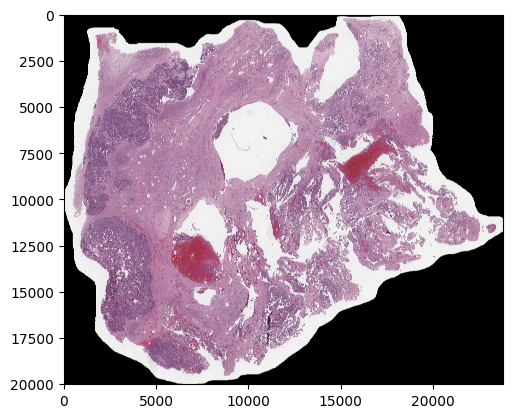

In [52]:
import tensorflow as tf
import matplotlib.pyplot as plt

pil_img = tf.keras.preprocessing.image.array_to_img(img)
plt.imshow(pil_img)

In [43]:
%%time

from PIL import Image
Image.MAX_IMAGE_PIXELS = 933120000

Image.open(data_df["Image.MAX_IMAGE_PIXELS = 933120000
                   path"].values[0])

KeyboardInterrupt: 